In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/

file_path = "/content/drive/My Drive/Colab Notebooks/master_RMS_MAV_SSC.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Ensure correct column selection (features = columns 2-9, target = column 10)
feature_columns = df.columns[[2, 5, 8, 11, 14, 17, 20, 23]]  # Select only MAV data from each channel
#feature_columns = df.columns[[1,2, 4,5, 7,8, 10,11, 13,14, 16,17, 19,20, 22,23]]  # Select MAV and RMS channel data
#feature_columns = df.columns[1:24]  # Select all EMG data
target_column = df.columns[25]  # Column 10 (class label)

In [ ]:
# **Filter out rows where class == 0**
#THIS CODE BLOCK SUPER IMPORTANT. IGNORE DATA CLASSED AS ZERO.
df = df[df[target_column] != 0]
df = df[df[target_column] != 7]

# Convert target column to categorical type (ensures proper color mapping)
df[target_column] = df[target_column].astype(str)  # Convert to string for discrete categories

In [ ]:
df.head()

,instance,channel1_RMS,channel1_MAV,channel1_SSC,channel2_RMS,channel2_MAV,channel2_SSC,channel3_RMS,channel3_MAV,channel3_SSC,...,channel6_RMS,channel6_MAV,channel6_SSC,channel7_RMS,channel7_MAV,channel7_SSC,channel8_RMS,channel8_MAV,channel8_SSC,class
1,2,0.000019,0.000015,22,0.000021,0.000016,20,0.000021,0.000016,27,...,0.000042,0.000030,32,0.000025,0.000019,32,0.000022,0.000017,14,1.0
3,4,0.000783,0.000656,40,0.000446,0.000342,42,0.000142,0.000108,41,...,0.000269,0.000219,39,0.000329,0.000263,37,0.000439,0.000349,40,2.0
5,6,0.000122,0.000092,40,0.000334,0.000260,32,0.000099,0.000078,35,...,0.000243,0.000185,41,0.000081,0.000067,32,0.000184,0.000144,34,3.0
7,8,0.000081,0.000062,28,0.000059,0.000046,23,0.000099,0.000079,26,...,0.000646,0.000527,32,0.000219,0.000159,29,0.000149,0.000113,25,4.0
9,10,0.000025,0.000020,35,0.000090,0.000060,46,0.000028,0.000022,38,...,0.000191,0.000143,43,0.000074,0.000058,42,0.000032,0.000026,46,5.0


In [ ]:
# Standardize data for t-SNE (helps with performance & accuracy)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_columns])

In [ ]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to DataFrame
df["tSNE-1"] = X_tsne[:, 0]
df["tSNE-2"] = X_tsne[:, 1]

<ipython-input-71-1d113a7b42fd>:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x="tSNE-1", y="tSNE-2", hue=df[target_column], palette=palette, data=df, alpha=0.8, edgecolor="black")


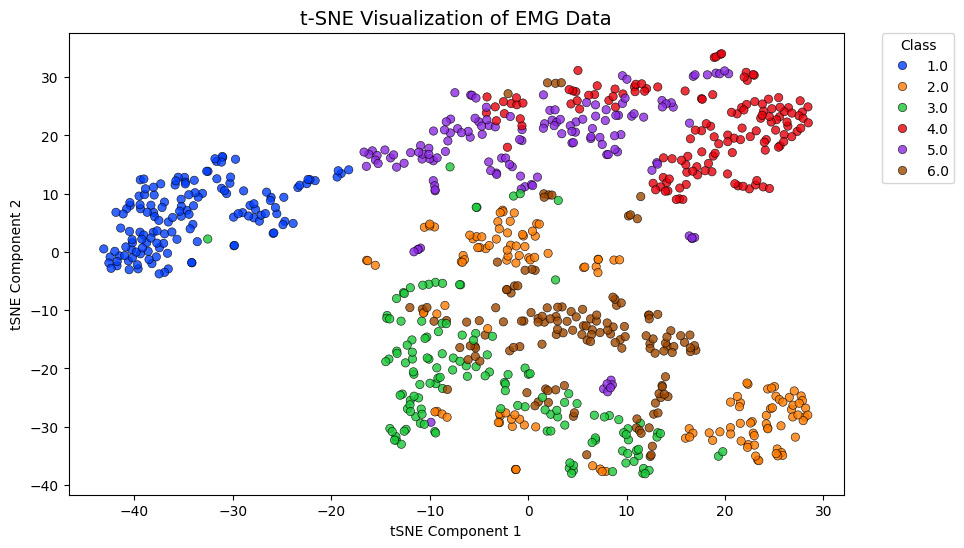

In [ ]:
# Define a high-contrast color palette (e.g., 'tab10' or 'Set1' for categorical data)
palette = sns.color_palette("bright", n_colors=8)  # 8 distinct colors

# Plot t-SNE visualization with improved legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tSNE-1", y="tSNE-2", hue=df[target_column], palette=palette, data=df, alpha=0.8, edgecolor="black")

# Improve plot appearance
plt.title("t-SNE Visualization of EMG Data", fontsize=14)
plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

# Improve legend placement
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

# Show plot
plt.show()

In [ ]:
X = df[feature_columns].values
y = df[target_column].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize features again (ensure same scaling as t-SNE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_scaled, y_train)

# Predict
y_pred = svm.predict(X_test_scaled)

Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        28
         2.0       0.93      0.93      0.93        28
         3.0       0.86      0.89      0.88        28
         4.0       0.96      0.93      0.95        28
         5.0       0.89      0.89      0.89        28
         6.0       0.96      0.93      0.95        28

    accuracy                           0.93       168
   macro avg       0.93      0.93      0.93       168
weighted avg       0.93      0.93      0.93       168



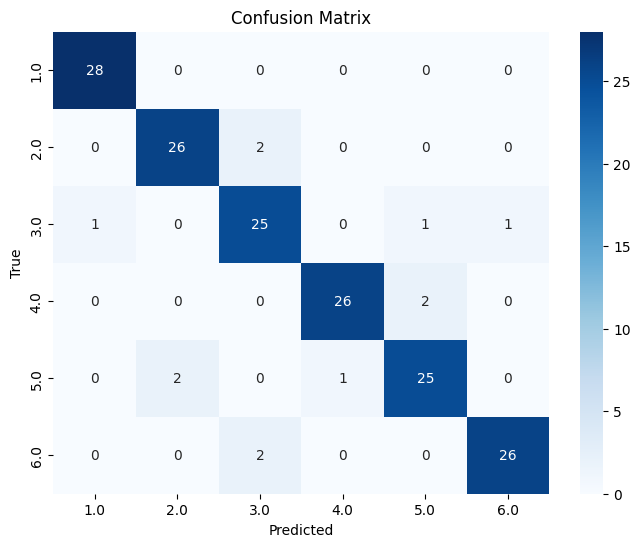

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

#Convert target values to integers using LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(y)  # Now y_int is a 1D array of integer labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y_int, test_size=0.2, random_state=42, stratify=y_int
)

#Convert integer labels to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#build neural net
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')  # Output layer: one neuron per class
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=1000,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


y_train_cat shape: (672, 6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,958 (54.52 KB)

 Trainable params: 13,958 (54.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.2236 - loss: 1.7793 - val_accuracy: 0.7353 - val_loss: 1.4561
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5157 - loss: 1.5034 - val_accuracy: 0.7353 - val_loss: 1.0872
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5905 - loss: 1.2520 - val_accuracy: 0.7647 - val_loss: 0.7796
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6561 - loss: 0.9974 - val_accuracy: 0.8529 - val_loss: 0.5790
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7036 - loss: 0.8694 - val_accuracy: 0.8824 - val_loss: 0.4747
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7427 - loss: 0.7238 - val_accuracy: 0.8824 - val_loss: 0.4104
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7642 - loss: 0.6506 - val_accuracy: 0.8824 - val_loss: 0.3827
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7794 - loss: 0.6134 - val_accuracy:

Test accuracy: 0.9405
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.98        28
         2.0       1.00      0.96      0.98        28
         3.0       0.86      0.86      0.86        28
         4.0       0.96      0.96      0.96        28
         5.0       0.96      0.96      0.96        28
         6.0       0.89      0.89      0.89        28

    accuracy                           0.94       168
   macro avg       0.94      0.94      0.94       168
weighted avg       0.94      0.94      0.94       168



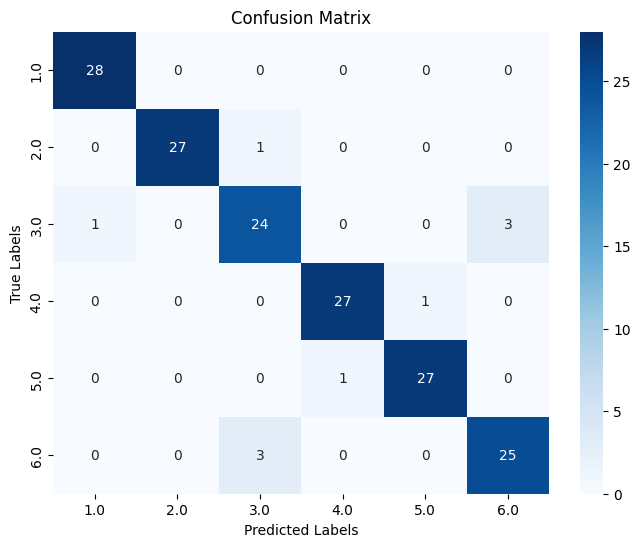

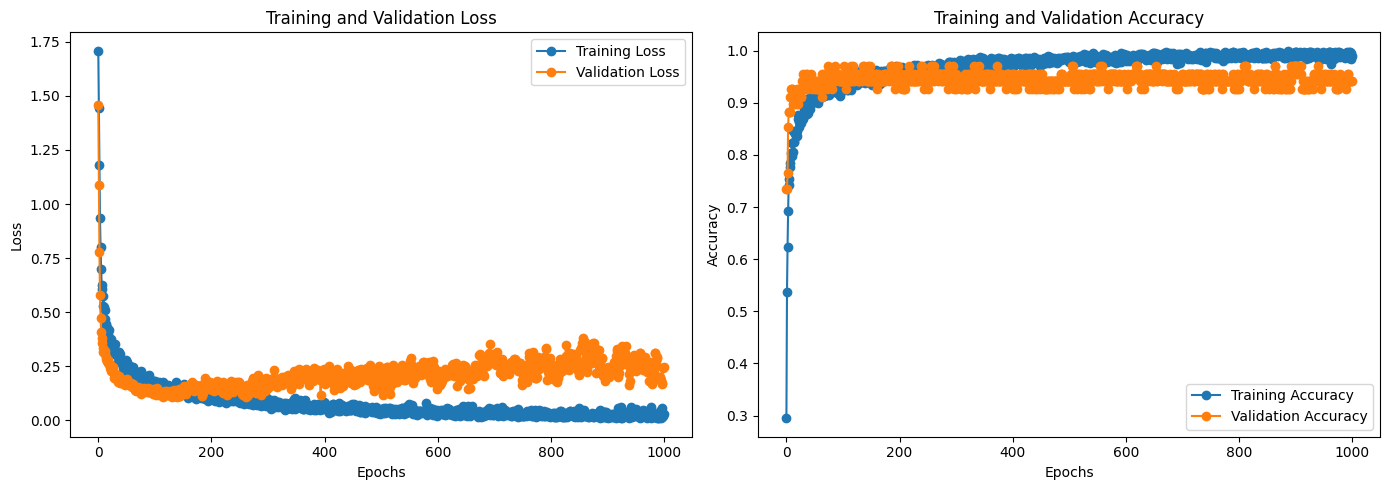

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Generate predictions (as probabilities) on the test set
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)
# For one-hot true labels, convert to integer labels as well.
y_true = np.argmax(y_test_cat, axis=1)

# Print the classification report (includes precision, recall, f1-score, support)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Compute the confusion matrix and display it using a heatmap
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plot the training history for loss and accuracy.
plt.figure(figsize=(14, 5))

# Plot Loss History (Training and Validation)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plot Accuracy History (Training and Validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
